## K - nearest Neighbors (KNN)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Read the Dataset 

In [3]:
import pandas as pd
df = pd.read_csv("iris (3).csv")

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Seprate X and Y from dataset

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Apply label encoding on Y

In [11]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y['species'])

In [12]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

## Prepprocessing X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
## Creating a numerical pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [19]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [22]:
x_pre = pd.DataFrame(X_pre,columns=cols)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Train test split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,Y,test_size=0.33,random_state=21)

In [24]:
xtrain.shape

(100, 4)

In [25]:
xtest.shape

(50, 4)

## Create a KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

## Check model accuracy in traing and testing 

In [28]:
model.score(xtrain,ytrain)

0.96

In [29]:
model.score(xtest,ytest)

0.9

## Predict train and test data

In [31]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [32]:
ypred_tr[0:5]

array([1, 0, 1, 2, 1])

In [34]:
ytrain.head()

,species
52,1
49,0
65,1
118,2
55,1


In [35]:
ypred_ts[0:5]

array([1, 0, 0, 0, 1])

In [36]:
ytest.head()

,species
92,1
44,0
7,0
21,0
95,1


## Plot the confusion matrix for test data

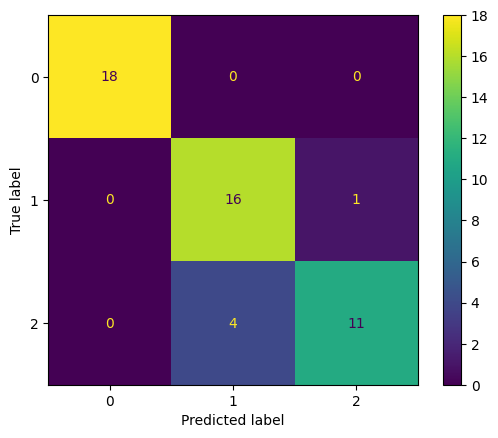

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

## Print Classification report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.80      0.94      0.86        17
           2       0.92      0.73      0.81        15

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



## Get the orignal labels for train and test

In [39]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [40]:
ypred_tr_lb

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'v

In [41]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)

## Predicting out of sample data

In [44]:
xnew = pd.read_csv('iris_sample (1).csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


## Make sure while prediction apply transform function only

In [46]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.33647757, -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182, -0.13197948, -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.13250973],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [47]:
xnew_pre  = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.336478,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,-0.131979,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.132510


## Prediction

In [48]:
preds = model.predict(xnew_pre)
preds

array([1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1])

In [49]:
pred_lb = le.inverse_transform(preds)
pred_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

## Save the predicted species in dataframe

In [50]:
xnew['species_pred'] = pred_lb
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,versicolor
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


## Save the values in csv file

In [51]:
xnew.to_csv('KNNResults.csv',index = False)

## Probability 

In [54]:
prob  = model.predict_proba(xnew_pre)
prob

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5]])